# Bayu Ramadany
# 09011181823004
# Support Vector Machine

Import Librabry yang digunakan

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Load dan Baca dataset

In [8]:
normal = pd.read_csv('C:/Users/bayu/Documents/AI/uts/ECG-SVM/datasets/1_normal.csv')
abnormal = pd.read_csv('C:/Users/bayu/Documents/AI/uts/ECG-SVM/datasets/2_abnormal.csv')

data jantung tidak normal

In [18]:
abnormal.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


data jantung normal

In [19]:
normal.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


disini kita berikan tanda atau label untuk membedakan antara abnormal dan normal
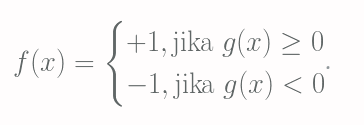

In [20]:
new_column_name = []
for num in range(abnormal.shape[1]-1):
    tem = 'time' + str(num)
    new_column_name.append(tem)
new_column_name.append("Label")    #LABEL = 1 FOR ABNORMAL
abnormal.columns = new_column_name    


column_name = []
for num in range(normal.shape[1]-1):
    tem = 'time' + str(num)
    column_name.append(tem)
column_name.append("Label")        #LABEL = 0 FOR NORMAL
normal.columns = column_name

abnormal.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
data=[normal,abnormal]
data=pd.concat(data)

disini kita shuffle datanya untuk dilakukan training

In [11]:
from sklearn.utils import shuffle
data=shuffle(data)                 
data.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
1900,0.972912,0.919865,0.663657,0.255079,0.404063,0.442438,0.380361,0.297968,0.265237,0.218962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
657,1.000000,0.853409,0.484659,0.378409,0.256250,0.303409,0.292045,0.288068,0.294318,0.278977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6307,0.954245,0.916981,0.913679,0.897641,0.901887,0.714151,0.472170,0.301887,0.194811,0.183019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4691,1.000000,0.367672,0.000000,0.105293,0.169607,0.156517,0.161070,0.178145,0.163916,0.177575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10096,1.000000,0.902312,0.162565,0.054437,0.082028,0.133482,0.237882,0.416853,0.407905,0.512304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


kita lakukan test/training  split dari label dan fitur yang ada 

In [12]:
y = data["Label"].values   # LABEL YANG ADA

data.drop(["Label"],axis=1,inplace=True)  

x = data  # FITUR YANG ADA

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  


# SVM

masuk ke metode Support Vector Machine
SVM merupakan salah satu metode klasifikasi dalam data mining.
SVM juga dapat melakukan prediksi baik pada klasifikasi maupun regresi Hyperplane dapat memaksimalkan jarak atau margin antara kelas data
Hyperplane terbaik antara kedua kelas dapat ditemukan dengan mengukur margin dan kemudian mencari titik maksimalnya
Hyperplane (batas keputusan) pemisah terbaik antara kedua kelas dapat ditemukan dengan mengukur margin hyperplane tersebut dan mencari titik maksimalnya
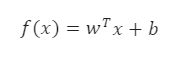

TEST
Sekarang, bagaimanakah caranya melakukan klasifikasi? Spesifiknya, diberikan input yang tidak termasuk di himpunan data training, termasuk dikategori manakah (-1 atau +1)? Mudah saja. Kita gunakan Definisi, lalu ubah sedikit hyperplane: substitusi dengan persamaan dan gunakan vektor optimal. Secara jelasnya, fungsi untuk melakukan klasifikasi dengan SVM berbentuk:
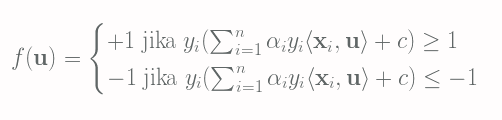

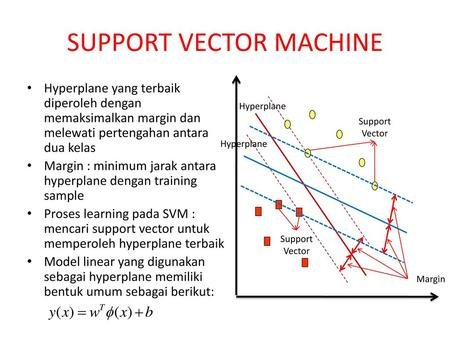

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(kernel = 'poly')

kasus kernel polinomial, kita juga harus mengirimkan nilai untuk parameter derajat kelas SVC. Ini pada dasarnya adalah derajat  polinomial. Lihat bagaimana kita dapat menggunakan kernel polinomial untuk mengimplementasikan kernel SVM:

Metode fit pada kelas SVC dipanggil untuk melatih algoritma pada data latih, yang dilewatkan sebagai parameter pada metode fit. Jalankan kode berikut untuk melatih algoritma:

In [25]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

disini kita membuat prediksi data yang sudah di test

In [30]:
result = svc.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,result)
print(cm)

# AKURASI
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
print(accuracy)

[[ 602  196]
 [  99 2013]]
0.8986254295532646


terlihat akurasi data yang tampil pada output yaitu sebesar = 0.8986254295532646

berikut kompirasi beberapa metode yang dilakukan
terlihat akurasi dari metode yang saya gunakan yaitu SVM. tidak terlalu bagus namun juga tidak terlalu buruk
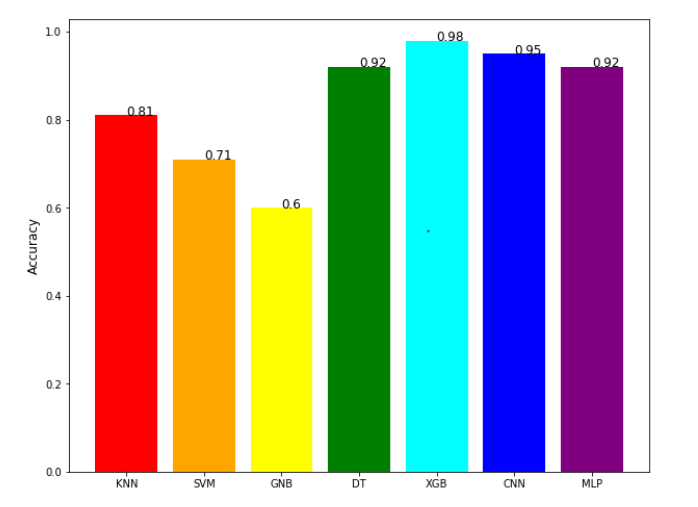

EKG adalah alat utama untuk mendiagnosis aktivitas listrik
dari hati. Setiap kelainan yang ada pada aktivitas jantung tersebut
tercermin dalam sinyal EKG.

sumber : https://github.com/enesgirgin/ECG-Analysis-with-Artifical-Neural-Network/blob/master/Support_vector_machine.ipynb